# Overview of age-abundance trends for solar twins and solar-like stars

## Author(s): Sven Buder (SB, WG4)

We use the relations from  
Nissen et al. (2015): http://adsabs.harvard.edu/abs/2015A%26A...579A..52N  
Spina et al. (2016): http://adsabs.harvard.edu/abs/2016A%26A...593A.125S  
Bedell et al. (2018): http://adsabs.harvard.edu/abs/2018arXiv180202576B  


### History:
200327 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import sys
import os
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
dr3 = Table.read('../../../catalogs/GALAH_DR3_main.fits')
dr3['age'] -= 1.26 # from difference of Solar age 

In [3]:
spina_bedell = Table.read('Spina_Bedell_joined.fits')

GCE_trends = dict() # m*age+b
GCE_trends['C']   = [0.0115 , 0.0014 ,-0.0836 , 0.0089 ,0.0394 , 0.0044]
GCE_trends['CH']  = [0.0115 , 0.0014 ,-0.0940 , 0.0079 ,0.0293 , 0.0030]
GCE_trends['O']   = [0.0088 , 0.0014 ,-0.0260 , 0.0075 ,0.0238 , 0.0028]
GCE_trends['Na']  = [0.0086 , 0.0016 ,-0.0614 , 0.0089 ,0.0273 , 0.0029]
GCE_trends['Mg']  = [0.0099 , 0.0009 ,-0.0367 , 0.0048 ,0.0121 , 0.0018]
GCE_trends['Al']  = [0.0139 , 0.0010 ,-0.0595 , 0.0054 ,0.0156 , 0.0019]
GCE_trends['Si']  = [0.0063 , 0.0006 ,-0.0308 , 0.0033 ,0.0110 , 0.0011]
GCE_trends['S']   = [0.0098 , 0.0015 ,-0.0537 , 0.0085 ,0.0240 , 0.0035]
GCE_trends['Ca']  = [-0.0011,  0.0006, 0.0217 , 0.0032 ,0.0089 , 0.0011]
GCE_trends['Sc']  = [0.0059 , 0.0009 ,-0.0263 , 0.0052 ,0.0159 , 0.0022]
GCE_trends['Sc2'] = [0.0059 , 0.0009 ,-0.0235 , 0.0052 ,0.0205 , 0.0025]
GCE_trends['Ti']  = [0.0036 , 0.0005 ,-0.0024 , 0.0032 ,0.0119 , 0.0014]
GCE_trends['Ti2'] = [0.0036 , 0.0005 ,-0.0094 , 0.0031 ,0.0115 , 0.0014]
GCE_trends['V']   = [0.0013 , 0.0007 ,-0.0023 , 0.0037 ,0.0091 , 0.0011]
GCE_trends['Cr']  = [-0.0016, 0.0003 ,0.0095  , 0.0019 ,0.0053 , 0.0008]
GCE_trends['Cr2'] = [-0.0016, 0.0003 ,0.0133  , 0.0019 ,0.0000 , 0.0001]
GCE_trends['Mn']  = [0.0023 , 0.0012 ,-0.0312 , 0.0063 ,0.0206 , 0.0020]
GCE_trends['Co']  = [0.0074 , 0.0011 ,-0.0460 , 0.0057 ,0.0178 , 0.0020]
GCE_trends['Ni']  = [0.0071 , 0.0009 ,-0.0505 , 0.0050 ,0.0172 , 0.0018]
GCE_trends['Cu']  = [0.0149 , 0.0017 ,-0.0850 , 0.0097 ,0.0244 , 0.0030]
GCE_trends['Zn']  = [0.0102 , 0.0014 ,-0.0699 , 0.0077 ,0.0224 , 0.0029]
GCE_trends['Sr']  = [-0.0251 , 0.0030, 0.1310 , 0.0164 ,0.0574 , 0.0060]
GCE_trends['Y']   = [-0.0238 , 0.0024, 0.1135 , 0.0130 ,0.0470 , 0.0051]
GCE_trends['Zr']  = [-0.0219 , 0.0023, 0.1179 , 0.0125 ,0.0422 , 0.0046]
GCE_trends['Ba']  = [-0.0317 , 0.0018, 0.1897 , 0.0093 ,0.0309 , 0.0039]
GCE_trends['La']  = [-0.0227 , 0.0021, 0.1397 , 0.0121 ,0.0350 , 0.0046]
GCE_trends['Ce']  = [-0.0220 , 0.0018, 0.1497 , 0.0097 ,0.0305 , 0.0039]
GCE_trends['Pr']  = [-0.0103 , 0.0025, 0.1534 , 0.0131 ,0.0451 , 0.0050]
GCE_trends['Nd']  = [-0.0198 , 0.0020, 0.1527 , 0.0108 ,0.0360 , 0.0038]
GCE_trends['Sm']  = [-0.0077 , 0.0017, 0.0668 , 0.0094 ,0.0226 , 0.0032]
GCE_trends['Eu']  = [-0.0056 , 0.0017, 0.0908 , 0.0093 ,0.0300 , 0.0033]
GCE_trends['Gd']  = [-0.0060 , 0.0016, 0.0592 , 0.0089 ,0.0279 , 0.0028]
GCE_trends['Dy']  = [-0.0073 , 0.0023, 0.0805 , 0.0123 ,0.0332 , 0.0043]


In [4]:
solar_twins = (
    (np.abs(dr3['teff'] - 5772) < 100) &
    (np.abs(dr3['logg'] - 4.438) < 0.1) &
    (np.abs(dr3['fe_h'] - 0.00) < 0.1) & 
    (dr3['flag_sp'] == 0) &
    (dr3['snr_c2_iraf'] > 40) 
    )

In [5]:
def gce_function(age,each_element):
    return GCE_trends[each_element][0]*age+GCE_trends[each_element][2]

In [6]:
def plot_xfe_vs_age(ax, each_element, xfe_range=[-0.5,1.5], age_bins = np.linspace(0,12.5,50)):

    selection = (
        solar_twins &
        (dr3['flag_'+each_element+'_fe'] == 0)
    )
    
    age_xfe = dr3['age'][selection]

    abundance_ratio = each_element+'_fe'

    ax.hist2d(
        age_xfe,
        dr3[abundance_ratio][selection],
        bins = (
            age_bins,
            np.linspace(xfe_range[0],xfe_range[1],50)
        ),
        cmin=1,cmap=parula        
    )
    
    difference = dr3[abundance_ratio][selection] - gce_function(age_xfe,each_element)

    ax.plot(age_bins,gce_function(age_bins,each_element),c='r')
    
    ax.set_ylim(xfe_range[0],xfe_range[1])
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)   
    ax.text(0.05,0.95,each_element+r': $'+"{:.2f}".format(np.mean(difference))+'\pm'+"{:.2f}".format(np.std(difference))+'$',transform=ax.transAxes,va='top', bbox=props)

### First plot all elements

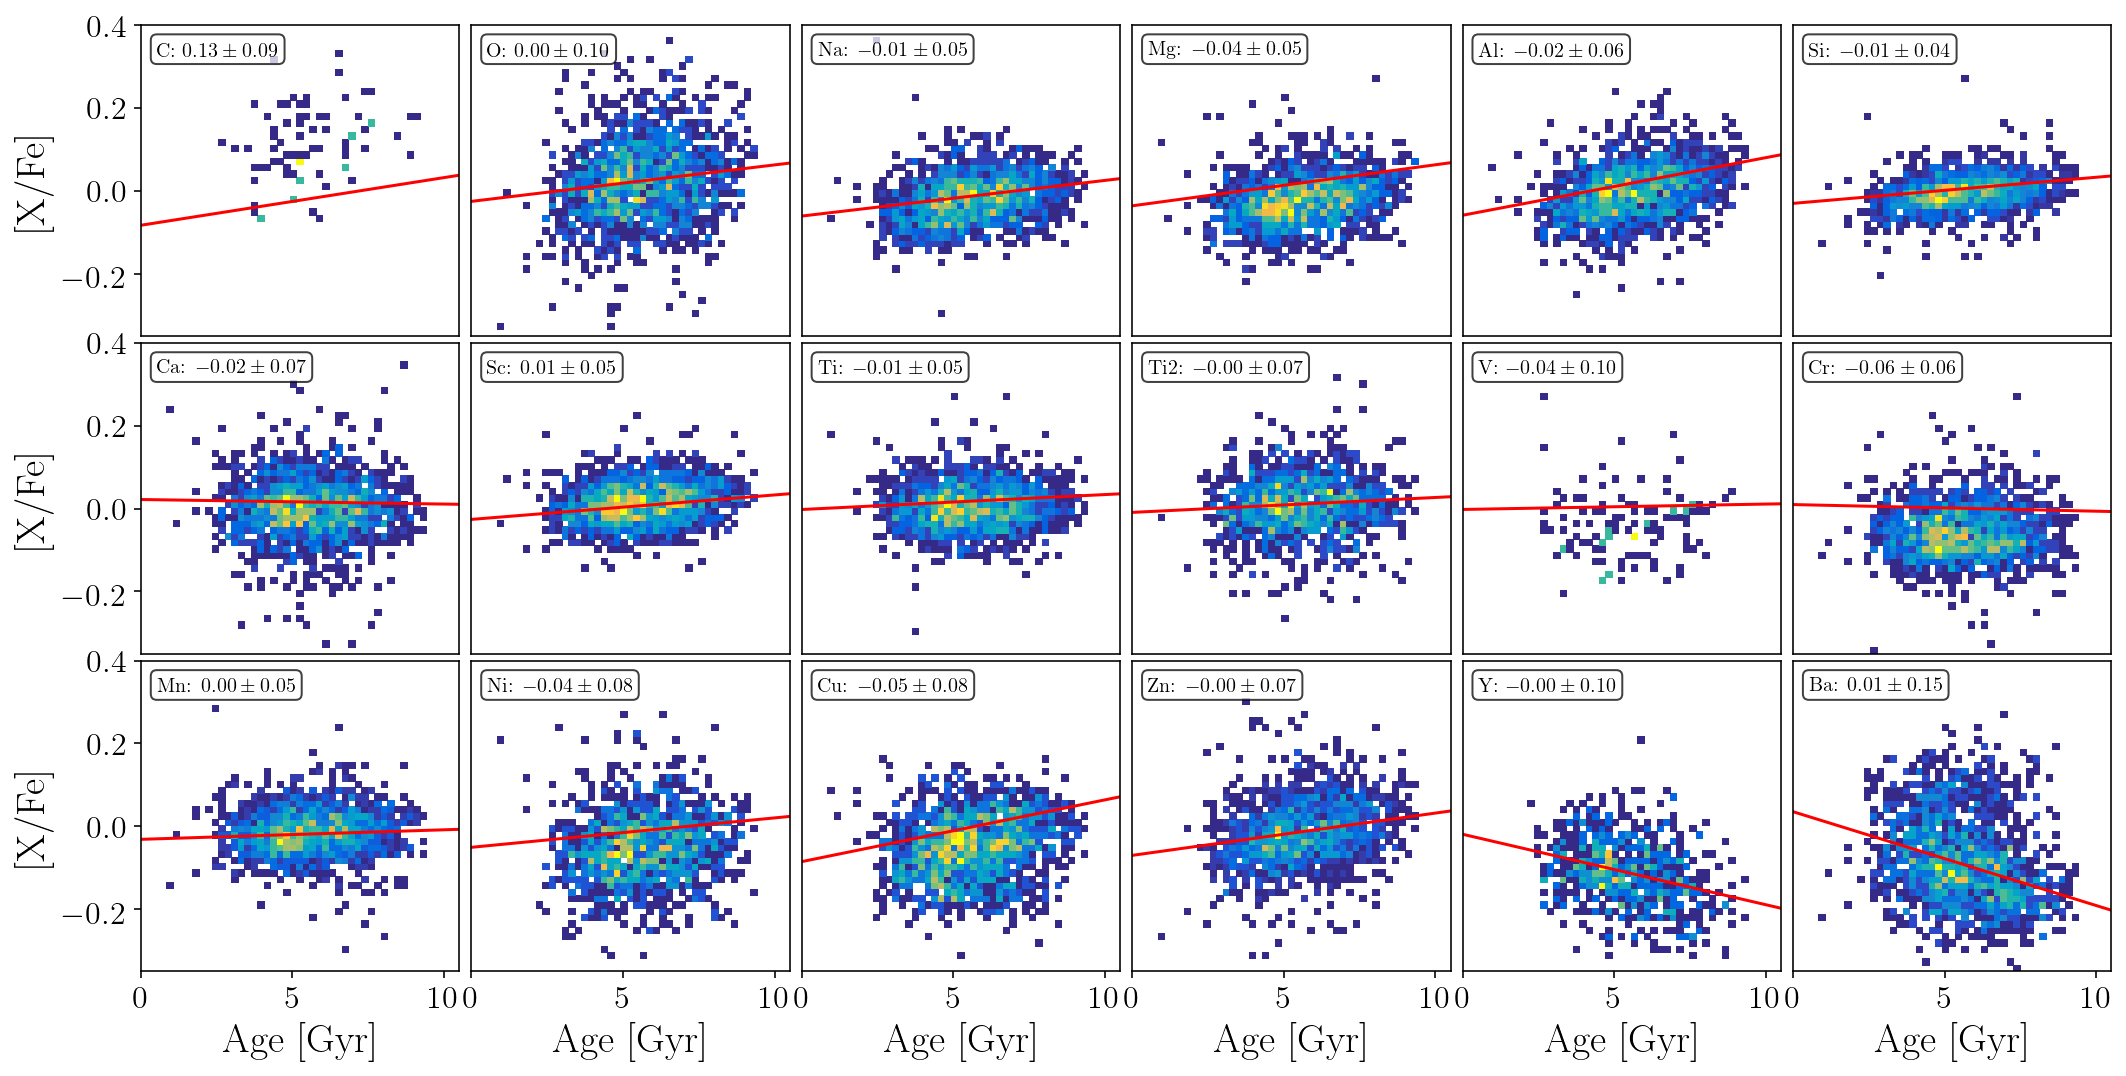

In [7]:
f, gs = plt.subplots(3,6,figsize=(15,7.5))

for each_index, each_element in enumerate(['C','O','Na','Mg','Al','Si','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Y','Ba']):
    
    row = int(np.floor(each_index/6))
    col = each_index - 6*row
    
    if each_element not in ['Y','Ba']:
        xfe_range=[-0.35,0.4]
    else:
        xfe_range=[-0.35,0.7]
    
    ax = gs[row,col]
    plot_xfe_vs_age(ax=ax, each_element=each_element,xfe_range=xfe_range,age_bins = np.linspace(.0,10.5,50))
    
    if row == 2:
        ax.set_xlabel('Age [Gyr]')
    else:
        ax.set_xticks([])
    if col == 0:
        ax.set_ylabel('[X/Fe]')
    else:
        ax.set_yticks([])
    
plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('../../../dr3_release_paper/figures/solar_twin_comparison.png',bbox_inches='tight',dpi=200)